# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

12. Before submission ensure that the path for the folder containing the data is "Data/" 


In [333]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import matplotlib as mpl
import pandas as pd
import warnings
warnings.filterwarnings('ignore')



# 1. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [334]:
# CodeWrite 
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here

def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0., kernel_param=1., num_iter_gd=100):
    #X : (n,d) shape numpy array
    #Y : (n,)  shape numpy array
    #X_test : (m,d) shape numpy array
    #kernel = 'linear' or 'rbf' or 'poly' 
    #reg_param = $\lambda$
    #num_iter_gd = number of GD iterations.

    #Returns the result of kernel logistic regression :
    #alpha: Vector of solutions for the dual. Numpy array of shape (n,)

    #Primal problem:
    #$ \min_w  \sum_{i=1}^n \log(1+\exp(-y_i* \w^\top \phi(\x_i)))  + \frac{\lambda}{2} ||\w||^2 $

    #the dual of which is

    #$ \min_alpha \sum_{i=1}^n \log(1+\exp(-y_i* \alpha^\top K_{:,i} ))  + \frac{\lambda}{2} \alpha^\top K \alpha $
    #where $\phi$ is the feature got by the kernel.

    #Where K is the nxn kernel matrix computed on the training data.

    #The kernel is defined by the kernel_param:
    #If kernel=linear: K(\u,\v) = \u^\top \v  
    #If kernel=poly:  K(\u,\v) = (1+\u^\top \v)^(kernel_param)
    #If kernel=rbf:  K(\u,\v) = \exp(-kernel_param*||\u-\v||^2)
    n = X.shape[0]
    K = np.zeros((n,n))
    if(kernel == 'linear'):
        K = np.matmul(X,X.T)
    elif(kernel == 'poly'):
        K = (1+np.matmul(X,X.T))**kernel_param
        #print(K.shape)
    elif(kernel == 'rbf'):
        K = np.exp(-kernel_param *(np.sum(X**2,axis = 1) + np.sum(X**2,axis = 1)[:,np.newaxis] - 2*np.dot(X,X.T)))
    alpha = np.zeros(n)
    for i in range(num_iter_gd):
        #print(alpha)
        delalpha = reg_param * np.dot(K,alpha) - np.sum((1 - 1/(1 + np.exp(-Y*np.matmul(K,alpha))))*Y*K,axis=1)
        alpha = alpha - 0.1*delalpha
    #alpha.reshape((n,1))
    return alpha

    

def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
    """
    Return the predictions on test_X using the learnt alphas
    """
    #alpha.reshape((alpha.shape[0],1))
    if(kernel == 'linear'):
        K = np.dot(test_X,train_X.T)
    elif(kernel == 'poly'):
        K = (1+np.dot(test_X,train_X.T))**kernel_param
    elif(kernel == 'rbf'):
        K = np.exp(-kernel_param* np.linalg.norm(test_X[:,np.newaxis] - train_X,axis = 2)**2)
    pred = np.sign(np.dot(K,alpha))
    return pred
    
    

    



In [335]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters 
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below. 

dataA = np.load('Data/dataset_A.npz')
dataB = np.load('Data/dataset_B.npz')
dataC = np.load('Data/dataset_C.npz')
dataD = np.load('Data/dataset_D.npz')

def split(X,Y):
    #Y = Y.reshape(Y.size,1)
    #Z = np.concatenate((X,Y),axis=1)
    #np.random.shuffle(Z)
    #X = Z[:,:-1]
    #Y = Z[:,-1]
    X_train = X[:int(0.8*len(X))]
    X_val = X[int(0.8*len(X)):]
    Y_train = Y[:int(0.8*len(Y))]
    Y_val = Y[int(0.8*len(Y)):]
    return X_train, X_val, Y_train, Y_val

def run(data):
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    X_trains, X_val, Y_trains, Y_val = split(X_train,Y_train)
    training_error = np.zeros(3)
    test_error = np.zeros(3)
    param = np.zeros(5)
    bestk = 0
    bests = 0
    #print("Linear Kernel")
    bestregparam = 0
    bestscore = 0
    alphalin = 0
    for i in [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]:
        #print(i)
        alpha = train_pred_logistic_regression(X_trains, Y_trains, 'linear', i)
        #print(alpha)
        Y_pred = test_pred(alpha, X_trains, Y_trains, X_val, 'linear', 1)
        score = np.sum(Y_pred == Y_val)/len(Y_val)
        #print(score)
        if(score > bestscore):
            bestscore = score
            bestregparam = i
            alphalin = alpha
    #print("Best regparam for linear kernel is ", bestregparam)
    #print("Best score for linear kernel is ", bestscore)
    param[0] = bestregparam
    bests = bestscore
    k = 1
    Y_pred = test_pred(alphalin, X_trains, Y_trains, X_test, 'linear', 1)
    #print(Y_pred.shape, Y_test.shape)
    test_error[0] = np.sum(Y_pred == Y_test)/len(Y_test)
    Y_pred = test_pred(alphalin, X_trains, Y_trains, X_train, 'linear', 1)
    training_error[0] = np.sum(Y_pred == Y_train)/len(Y_train)
    #print("Training error = ", training_error[0], " test error = ", test_error[0])
    print("Linear regparam = ", param[0], " training error = ", 1-training_error[0], " test error = ", 1-test_error[0])
    #print("Polynomial Kernel")
    bestregparam = 0
    bestkernelparam = 0
    bestscore = 0
    alphapoly = 0
    for i in [1e-3, 1e-2, 1e-1, 1]:
        for j in [1,2,4,8]:
            #print(i,j)
            alpha = train_pred_logistic_regression(X_trains, Y_trains, 'poly', i, j)
            #print(alpha)
            Y_pred = test_pred(alpha, X_trains, Y_trains, X_val, 'poly', j)
            score = np.sum(Y_pred == Y_val)/len(Y_val)
            #print(score)
            if(score > bestscore):
                bestscore = score
                bestregparam = i
                bestkernelparam = j
                alphapoly = alpha
    #print("Best regparam for poly kernel is ", bestregparam, " and best kernelparam is ", bestkernelparam)
    #print("Best score for poly kernel is ", bestscore)
    param[1] = bestregparam
    param[2] = bestkernelparam
    if(bestscore > bests):
        bests = bestscore
        k = 2
    Y_pred = test_pred(alphapoly, X_trains, Y_trains, X_test, 'poly', bestkernelparam)
    test_error[1] = np.sum(Y_pred == Y_test)/len(Y_test)
    Y_pred = test_pred(alphapoly, X_trains, Y_trains, X_train, 'poly', bestkernelparam)
    training_error[1] = np.sum(Y_pred == Y_train)/len(Y_train)
    #print("Training error = ", training_error[1], " test error = ", test_error[1])
    print("Polynomial regparam = ", param[1], " kernelparam = ", param[2], " training error = ", 1-training_error[1], " test error = ", 1-test_error[1])
    #print("RBF Kernel")
    bestregparam = 0
    bestkernelparam = 0
    bestscore = 0
    alpharbf = 0
    for i in [1e-3, 1e-2, 1e-1, 1, 10]:
        for j in [1e-3, 1e-2, 1e-1, 1, 10]:
            #print(i,j)
            alpha = train_pred_logistic_regression(X_trains, Y_trains, 'rbf', i, j)
            Y_pred = test_pred(alpha, X_trains, Y_trains, X_val, 'rbf', j)
            score = np.sum(Y_pred == Y_val)/len(Y_val)
            #print(score)
            if(score > bestscore):
                bestscore = score
                bestregparam = i
                bestkernelparam = j
                alpharbf = alpha
    #print("Best regparam for rbf kernel is ", bestregparam, " and best kernelparam is ", bestkernelparam)
    #print("Best score for rbf kernel is ", bestscore)
    param[3] = bestregparam
    param[4] = bestkernelparam
    if(bestscore > bests):
        bests = bestscore
        k = 3
    Y_pred = test_pred(alpharbf, X_trains, Y_trains, X_test, 'rbf', bestkernelparam)
    test_error[2] = np.sum(Y_pred == Y_test)/len(Y_test)
    Y_pred = test_pred(alpharbf, X_trains, Y_trains, X_train, 'rbf', bestkernelparam)
    training_error[2] = np.sum(Y_pred == Y_train)/len(Y_train)
    #print("Training error = ", training_error[2], " test error = ", test_error[2])
    print("RBF regparam = ", param[3], " kernelparam = ", param[4], " training error = ", 1-training_error[2], " test error = ", 1-test_error[2])
    if(k == 1):
        #print("Best kernel is linear")
        #print("Best regparam is ", param[0])
        print("Best kernel = Linear, regparam = ", param[0])
    elif(k == 2):
        #print("Best kernel is polynomial")
        #print("Best regparam is ", param[1], " and best kernelparam is ", param[2])
        print("Best kernel = Polynomial, regparam = ", param[1], " kernelparam = ", param[2])
    else:
        #print("Best kernel is rbf")
        #print("Best regparam is ", param[3], " and best kernelparam is ", param[4])
        print("Best kernel = RBF, regparam = ", param[3], " kernelparam = ", param[4])
    return param,alphalin,alphapoly,alpharbf

print("For dataset A")
paramA,alphalinA,alphapolyA,alpharbfA = run(dataA)
print("-------------------")
print("For dataset B")
paramB,alphalinB,alphapolyB,alpharbfB = run(dataB)
print("-------------------")
print("For dataset C")
paramC,alphalinC,alphapolyC,alpharbfC = run(dataC)
print("-------------------")
print("For dataset D")
paramD,alphalinD,alphapolyD,alpharbfD = run(dataD)
print("-------------------")

    


For dataset A
Linear regparam =  0.0001  training error =  0.124  test error =  0.14
Polynomial regparam =  0.001  kernelparam =  1.0  training error =  0.20066666666666666  test error =  0.21799999999999997
RBF regparam =  0.001  kernelparam =  1.0  training error =  0.0006666666666667043  test error =  0.0040000000000000036
Best kernel = RBF, regparam =  0.001  kernelparam =  1.0
-------------------
For dataset B
Linear regparam =  0.0001  training error =  0.2513333333333333  test error =  0.244
Polynomial regparam =  0.001  kernelparam =  4.0  training error =  0.19466666666666665  test error =  0.22199999999999998
RBF regparam =  0.001  kernelparam =  0.01  training error =  0.17733333333333334  test error =  0.20799999999999996
Best kernel = RBF, regparam =  0.001  kernelparam =  0.01
-------------------
For dataset C
Linear regparam =  0.0001  training error =  0.5026666666666666  test error =  0.5117845117845118
Polynomial regparam =  0.001  kernelparam =  1.0  training error =

### Table of all the best parameters and errors for all datasets

|Dataset|Kernel|Regularisation|Kernel Param|Training Error|Test Error|  
|:---:|:---:|:---:|:---:|:---:|:---:|
|A|Linear|0.0001|N/A|0.124|0.14|
|A|Polynomial|0.001|1.0|0.201|0.218|
|A|RBF|0.001|1.0|0.001|0.004|
|B|Linear|0.0001|N/A|0.251|0.244|
|B|Polynomial|0.001|4.0|0.195|0.222|
|B|RBF|0.001|0.01|0.177|0.208|
|C|Linear|0.0001|N/A|0.503|0.512|
|C|Polynomial|0.001|1.0|0.503|0.512|
|C|RBF|0.001|0.1|0.001|0.034|
|D|Linear|0.0|N/A|1.0|1.0|
|D|Polynomial|0.0|0.0|1.0|1.0|
|D|RBF|0.001|0.001|0.02|0.089|

### Table of Best kernel and its corresponding parameters for each dataset
|Dataset|Best Kernel|Regularisation|Kernel Param|Training Error|Test Error|
|:---:|:---:|:---:|:---:|:---:|:---:|
|A|RBF|0.001|1.0|0.001|0.004|
|B|RBF|0.001|0.01|0.177|0.208|
|C|RBF|0.001|0.1|0.001|0.034|
|D|RBF|0.001|0.001|0.02|0.089|

### Observations

- RBF has the highest accuracy for all datasets.
- Linear has the lowest accuracy for most of the datasets.
- Both Linear and Polynomial have a very bad accuracy for dataset C, but RBF has a very good accuracy while compared.
- All Kernels had a similar performance for dataset B compared to other datasets as the data was not seperable by a boundary.


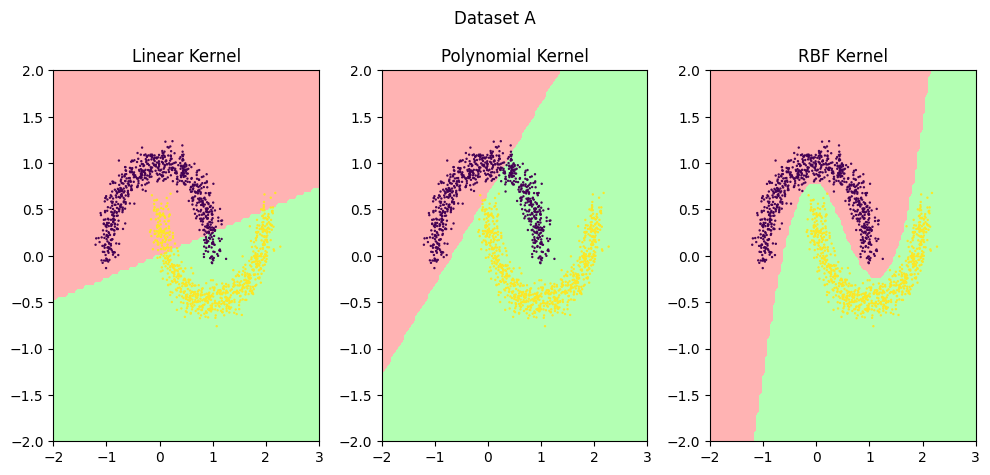

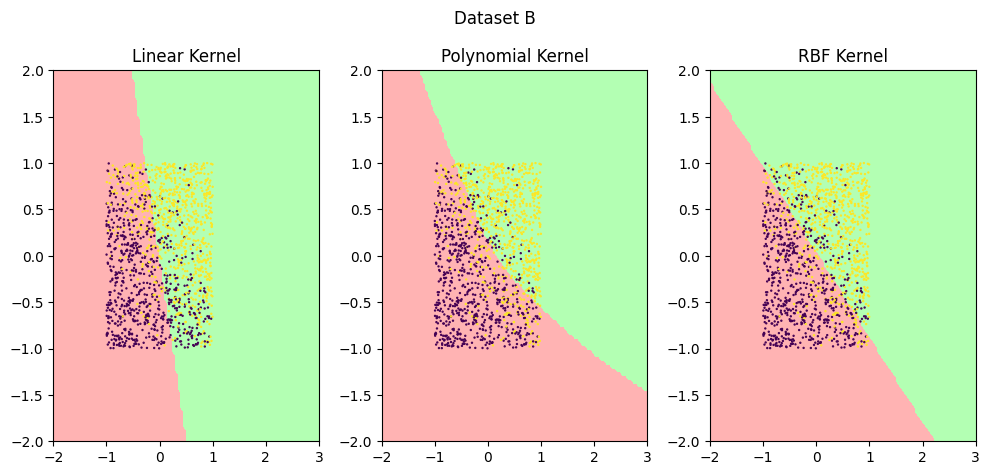

In [311]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6
def plotlog(data,params,alphalin,alphapoly,alpharbf,Name):
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    X_trains, X_val, Y_trains, Y_val = split(X_train,Y_train)
    Y_train = Y_train.reshape(Y_train.size,1)
    Y_test = Y_test.reshape(Y_test.size,1)
    Y_trains = Y_trains.reshape(Y_trains.size,1)
    Y_val = Y_val.reshape(Y_val.size,1)
    f = plt.figure()
    f.set_figwidth(10)
    #print("Linear Kernel")
    X,Y = np.meshgrid(np.linspace(-2,3,100),np.linspace(-2,2,100))
    Z = test_pred(alphalin, X_trains, Y_trains, np.c_[X.ravel(),Y.ravel()], 'linear', 1)
    Z = Z.reshape(100,100)
    plt.subplot(1,3,1)
    plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
    plt.scatter(X_train[:,0],X_train[:,1],s=0.5,c=Y_train)
    plt.title("Linear Kernel")
    #plt.show()
    #print("Polynomial Kernel")
    X,Y = np.meshgrid(np.linspace(-2,3,100),np.linspace(-2,2,100))
    Z = test_pred(alphapoly, X_trains, Y_trains, np.c_[X.ravel(),Y.ravel()], 'poly', params[2])
    Z = Z.reshape(100,100)
    plt.subplot(1,3,2)
    plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
    plt.scatter(X_train[:,0],X_train[:,1],s=0.5,c=Y_train)
    plt.title("Polynomial Kernel")
    #plt.show()
    #rint("RBF Kernel")
    X,Y = np.meshgrid(np.linspace(-2,3,100),np.linspace(-2,2,100))
    Z = test_pred(alpharbf, X_trains, Y_trains, np.c_[X.ravel(),Y.ravel()], 'rbf', params[4])
    Z = Z.reshape(100,100)
    plt.subplot(1,3,3)
    plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
    plt.scatter(X_train[:,0],X_train[:,1],s=0.5,c=Y_train)
    plt.title("RBF Kernel")
    plt.suptitle("Dataset " + Name)
    plt.tight_layout()
    plt.show()

#print("For dataset A")
plotlog(dataA,paramA,alphalinA,alphapolyA,alpharbfA,"A")
#print("For dataset B")
plotlog(dataB,paramB,alphalinB,alphapolyB,alpharbfB,"B")
    

    


# 2. SVM

Write code for learning SVM below. Also write code for choosing best hyperparameters for each kernel type. You may use sklearn.svm for this purpose. (use a part of training set as validation set)

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [313]:
# CodeWrite cell
# Write SVM classifier using SKlearn
# write only functions here



def svmlinearscore(X,Y,Regparam):
    clf = svm.SVC(kernel='linear', C=Regparam)
    X_train, X_val, Y_train, Y_val = split(X,Y)
    clf.fit(X_train, Y_train)
    return clf.score(X_val,Y_val)


def svmpolyscore(X,Y,Regparam,degree):
    clf = svm.SVC(kernel='poly', C=Regparam,degree=degree,coef0 = 1.0)
    X_train, X_val, Y_train, Y_val = split(X,Y)
    clf.fit(X_train, Y_train)
    return clf.score(X_val,Y_val)

def svmrbfscore(X,Y,Regparam,gamma):
    clf = svm.SVC(kernel='rbf', C=Regparam,gamma=gamma)
    X_train, X_val, Y_train, Y_val = split(X,Y)
    clf.fit(X_train, Y_train)
    return clf.score(X_val,Y_val)

def svmlinear(X,Y,Regparam):
    clf = svm.SVC(kernel='linear', C=Regparam)
    clf.fit(X, Y)
    return clf

def svmpoly(X,Y,Regparam,degree):
    clf = svm.SVC(kernel='poly', C=Regparam,degree=degree,coef0 = 1.0)
    clf.fit(X, Y)
    return clf

def svmrbf(X,Y,Regparam,gamma):
    clf = svm.SVC(kernel='rbf', C=Regparam,gamma=gamma)
    clf.fit(X, Y)
    return clf




In [315]:
# CodeWrite cell
# Write code here for doing validation (for kernel_param and regularisation_param)
# on a subset of the training set. 
# Also for generating the numbers that you report below.
dataA = np.load('dataset_A.npz')
dataB = np.load('dataset_B.npz')
dataC = np.load('dataset_C.npz')
dataD = np.load('dataset_D.npz')

def split(X,Y):
    #Y = Y.reshape(Y.size,1)
    #Z = np.concatenate((X,Y),axis=1)
    #np.random.shuffle(Z)
    #X = Z[:,:-1]
    #Y = Z[:,-1]
    X_train = X[:int(0.8*len(X))]
    X_val = X[int(0.8*len(X)):]
    Y_train = Y[:int(0.8*len(Y))]
    Y_val = Y[int(0.8*len(Y)):]
    return X_train, X_val, Y_train, Y_val

def best_linearparam(X,Y):
    bestscore = 0
    bestregparam = 0
    for i in [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]:
        score = svmlinearscore(X,Y,i)
        if score > bestscore:
            bestscore = score
            bestregparam = i
    return bestregparam

def best_polyparam(X,Y):
    bestscore = 0
    bestregparam = 0
    bestdegree = 0
    for i in [1e-4, 1e-3, 1e-2, 1e-1, 1]:
        for j in [1,2,4,8]:
            score = svmpolyscore(X,Y,i,j)
            if score > bestscore:
                bestscore = score
                bestregparam = i
                bestdegree = j
    return bestregparam, bestdegree

def best_rbfparam(X,Y):
    bestscore = 0
    bestregparam = 0
    bestgamma = 0
    for i in [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]:
        for j in [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]:
            score = svmrbfscore(X,Y,i,j)
            if score > bestscore:
                bestscore = score
                bestregparam = i
                bestgamma = j
    return bestregparam, bestgamma

def error_linear(X_train,Y_train,X_test,Y_test,Regparam):
    clf = svmlinear(X_train,Y_train,Regparam)
    return 1-clf.score(X_train,Y_train),1-clf.score(X_test,Y_test)

def error_poly(X_train,Y_train,X_test,Y_test,Regparam,degree):
    clf = svmpoly(X_train,Y_train,Regparam,degree)
    return 1-clf.score(X_train,Y_train),1-clf.score(X_test,Y_test)

def error_rbf(X_train,Y_train,X_test,Y_test,Regparam,gamma):
    clf = svmrbf(X_train,Y_train,Regparam,gamma)
    return 1-clf.score(X_train,Y_train),1-clf.score(X_test,Y_test)

# Print best training and test error for each dataset for all kernels and the best kernel
def best_error(data):
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    train_error = [0,0,0]
    test_error = [0,0,0]
    param = [0,0,0,0,0]
    #print("Linear")
    bestregparam = best_linearparam(X_train,Y_train)
    param[0] = bestregparam
    #print("Best Regularization Parameter: ",bestregparam)
    train_error[0],test_error[0] = error_linear(X_train,Y_train,X_test,Y_test,bestregparam)
    #print("Training Error: ",train_error[0])
    #print("Test Error: ",test_error[0])
    print("Linear : regparam = ",bestregparam," train error = ",train_error[0]," test error = ",test_error[0])
    #print("Polynomial")
    bestregparam, bestdegree = best_polyparam(X_train,Y_train)
    param[1] = bestregparam
    param[2] = bestdegree
    #print("Best Regularization Parameter: ",bestregparam)
    #print("Best Degree: ",bestdegree)
    train_error[1],test_error[1] = error_poly(X_train,Y_train,X_test,Y_test,bestregparam,bestdegree)
    #print("Training Error: ",train_error[1])
    #print("Test Error: ",test_error[1])
    print("Polynomial : regparam = ",bestregparam," degree = ",bestdegree," train error = ",train_error[1]," test error = ",test_error[1])
    #print("RBF")
    bestregparam, bestgamma = best_rbfparam(X_train,Y_train)
    param[3] = bestregparam
    param[4] = bestgamma
    #print("Best Regularization Parameter: ",bestregparam)
    #print("Best Gamma: ",bestgamma)
    train_error[2],test_error[2] = error_rbf(X_train,Y_train,X_test,Y_test,bestregparam,bestgamma)
    #print("Training Error: ",train_error[2])
    #print("Test Error: ",test_error[2])
    print("RBF : regparam = ",bestregparam," gamma = ",bestgamma," train error = ",train_error[2]," test error = ",test_error[2])
    #print("Best Kernel")
    bestkernel = np.argmin(test_error)
    if bestkernel == 0:
        print("Linear")
    elif bestkernel == 1:
        print("Polynomial")
    else:
        print("RBF")
    print("Training Error: ",train_error[bestkernel],"Test Error: ",test_error[bestkernel])
    return param

print("Dataset A")
parama = best_error(dataA)
print("--------------------")
print("Dataset B")
paramb = best_error(dataB)
print("--------------------")
print("Dataset C")
paramc = best_error(dataC)
print("--------------------")
print("Dataset D")
paramd = best_error(dataD)
print("--------------------")

# plot graph 
        




Dataset A
Linear : regparam =  1  train error =  0.1286666666666667  test error =  0.134
Polynomial : regparam =  0.001  degree =  8  train error =  0.0013333333333332975  test error =  0.006000000000000005
RBF : regparam =  0.1  gamma =  10  train error =  0.0013333333333332975  test error =  0.0020000000000000018
RBF
Training Error:  0.0013333333333332975 Test Error:  0.0020000000000000018
--------------------
Dataset B
Linear : regparam =  1  train error =  0.17800000000000005  test error =  0.20599999999999996
Polynomial : regparam =  1  degree =  1  train error =  0.17733333333333334  test error =  0.20799999999999996
RBF : regparam =  10  gamma =  0.01  train error =  0.17666666666666664  test error =  0.20199999999999996
RBF
Training Error:  0.17666666666666664 Test Error:  0.20199999999999996
--------------------
Dataset C
Linear : regparam =  0.0001  train error =  0.09399999999999997  test error =  0.1077441077441077
Polynomial : regparam =  0.001  degree =  8  train error = 

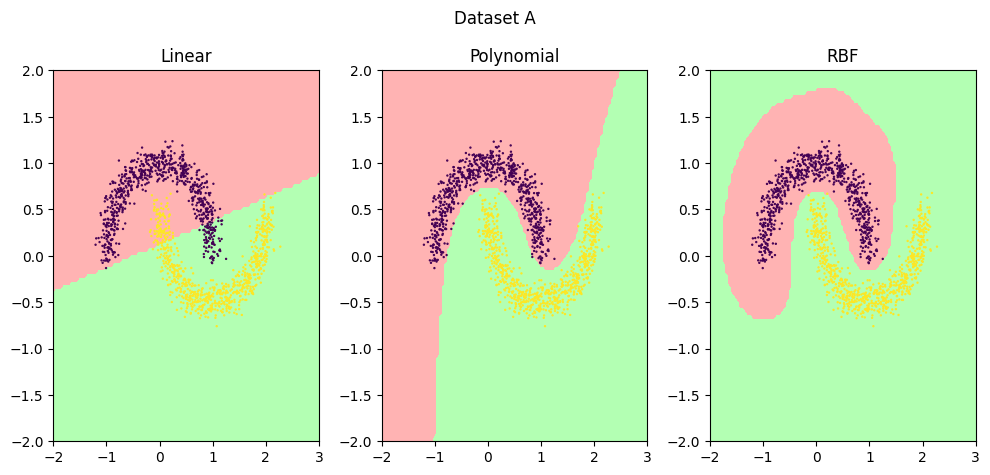

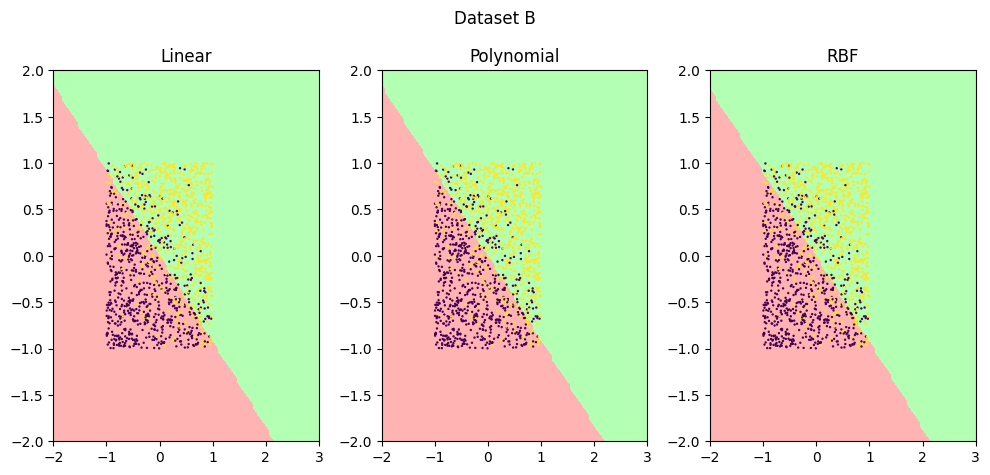

In [317]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

# Print the plots for best parameters for all kernels

def bestparamplot(data):
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    print("Linear")
    bestregparam = best_linearparam(X_train,Y_train)
    print("Best Regularization Parameter: ",bestregparam)
    clf = svmlinear(X_train,Y_train,bestregparam)
    X,Y = np.meshgrid(np.linspace(-2,3,100),np.linspace(-2,2,100))
    Z = clf.predict(np.c_[X.ravel(),Y.ravel()])
    Z = Z.reshape(X.shape)
    plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
    plt.scatter(X_train[:,0],X_train[:,1],s=0.5,c=Y_train)
    plt.show()
    print("Polynomial")
    bestregparam, bestdegree = best_polyparam(X_train,Y_train)
    print("Best Regularization Parameter: ",bestregparam)
    print("Best Degree: ",bestdegree)
    clf = svmpoly(X_train,Y_train,bestregparam,bestdegree)
    X,Y = np.meshgrid(np.linspace(-2,3,100),np.linspace(-2,2,100))
    Z = clf.predict(np.c_[X.ravel(),Y.ravel()])
    Z = Z.reshape(X.shape)
    plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
    plt.scatter(X_train[:,0],X_train[:,1],s=0.5,c=Y_train)
    plt.show()
    print("RBF")
    bestregparam, bestgamma = best_rbfparam(X_train,Y_train)
    print("Best Regularization Parameter: ",bestregparam)
    print("Best Gamma: ",bestgamma)
    clf = svmrbf(X_train,Y_train,bestregparam,bestgamma)
    X,Y = np.meshgrid(np.linspace(-2,3,100),np.linspace(-2,2,100))
    Z = clf.predict(np.c_[X.ravel(),Y.ravel()])
    Z = Z.reshape(X.shape)
    plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
    plt.scatter(X_train[:,0],X_train[:,1],s=0.5,c=Y_train)
    plt.show()

def paramplot(data,param,Name):
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    clf = svmlinear(X_train,Y_train,param[0])
    X,Y = np.meshgrid(np.linspace(-2,3,100),np.linspace(-2,2,100))
    Z = clf.predict(np.c_[X.ravel(),Y.ravel()])
    Z = Z.reshape(X.shape)
    f = plt.figure()
    f.set_figwidth(10)
    plt.subplot(1,3,1)
    plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
    plt.scatter(X_train[:,0],X_train[:,1],s=0.5,c=Y_train)
    plt.title("Linear")
    clf = svmpoly(X_train,Y_train,param[1],param[2])
    X,Y = np.meshgrid(np.linspace(-2,3,100),np.linspace(-2,2,100))
    Z = clf.predict(np.c_[X.ravel(),Y.ravel()])
    Z = Z.reshape(X.shape)
    plt.subplot(1,3,2)
    plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
    plt.scatter(X_train[:,0],X_train[:,1],s=0.5,c=Y_train)
    plt.title("Polynomial")
    clf = svmrbf(X_train,Y_train,param[3],param[4])
    X,Y = np.meshgrid(np.linspace(-2,3,100),np.linspace(-2,2,100))
    Z = clf.predict(np.c_[X.ravel(),Y.ravel()])
    Z = Z.reshape(X.shape)
    plt.subplot(1,3,3)
    plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
    plt.scatter(X_train[:,0],X_train[:,1],s=0.5,c=Y_train)
    plt.title("RBF")
    plt.suptitle("Dataset " + Name)
    plt.tight_layout()
    plt.show()

paramplot(dataA,parama,'A')
paramplot(dataB,paramb,'B')







### Table of all the best parameters and errors for all datasets

|Dataset|Kernel|Regularisation|Kernel Param|Training Error|Test Error|
|:---:|:---:|:---:|:---:|:---:|:---:|
|A|Linear|0.0001|N/A|0.129|0.134|
|A|Polynomial|0.001|1.0|0.001|0.006|
|A|RBF|0.1|10.0|0.001|0.002|
|B|Linear|0.0001|N/A|0.178|0.206|
|B|Polynomial|0.001|1.0|0.177|0.208|
|B|RBF|10.0|0.01|0.177|0.202|
|C|Linear|0.0001|N/A|0.094|0.108|
|C|Polynomial|0.001|8.0|0.001|0.024|
|C|RBF|10.0|0.001|0.000|0.017|
|D|Linear|0.0001|N/A|0.027|0.053|
|D|Polynomial|0.1|2.0|0.105|0.047|
|D|RBF|10.0|0.001|0.027|0.071|

### Table of Best kernel and its corresponding parameters for each dataset
|Dataset|Best Kernel|Regularisation|Kernel Param|Training Error|Test Error|
|:---:|:---:|:---:|:---:|:---:|:---:|
|A|RBF|0.1|10.0|0.001|0.002|
|B|RBF|10.0|0.01|0.177|0.202|
|C|RBF|10.0|0.001|0.000|0.017|
|D|Polynomial|0.1|2.0|0.105|0.047|

### Observations
- SVM has much better performance than compared to Logistic Regression.
- RBF has the highest accuracy for all datasets except D.
- Linear has the lowest accuracy for most of the datasets.
- Linear and Polynomial have significantly better accuracy for dataset D compared to RBF due to overfitting.
- All Kernels had a similar performance for dataset B compared to other datasets as the data was not seperable by a boundary.
- RBF and Polynomial have a very good accuracy for dataset C and A, but Linear has a very bad accuracy while compared as the data is not linearly seperable.




# 3. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [319]:
# CodeWrite cell
# Write Decision tree classifier from scratch, 
# write only functions here (you may write extra functions here if you wish)

def split(X,Y):
    #Y = Y.reshape(Y.size,1)
    #Z = np.concatenate((X,Y),axis=1)
    #np.random.shuffle(Z)
    #X = Z[:,:-1]
    #Y = Z[:,-1]
    X_train = X[:int(0.8*len(X))]
    X_val = X[int(0.8*len(X)):]
    Y_train = Y[:int(0.8*len(Y))]
    Y_val = Y[int(0.8*len(Y)):]
    return X_train, X_val, Y_train, Y_val

class node:
    def __init__(self,feature,threshold,label):
        self.feature = feature
        self.threshold = threshold
        self.label = 0
        self.left = None
        self.right = None
        
def entropycal(p):
    if p == 0 or p == 1:
        return 0
    return -p*np.log2(p)-(1-p)*np.log2(1-p)

#find best threshold and feature for more than 2 features
def eval_split(X,Y,criterion):
    bestfeature = None
    bestthreshold = None
    bestentropy = 1
    bestaccuracy = 0
    for i in range(X.shape[1]):
        thresholds = np.sort(np.unique(X[:,i]))
        x_val = np.sort(X[:,i])
        y_val = Y[np.argsort(X[:,i])]
        leftpos = 0
        rightpos = np.count_nonzero(y_val==1)
        leftcount = 0
        rightcount = y_val.shape[0]
        #print(y_val.shape[0])
        for j in thresholds:
            while (leftcount < x_val.shape[0] and x_val[leftcount] < j):
                if y_val[leftcount] == 1:
                    leftpos += 1
                    rightpos -=1
                leftcount += 1
                rightcount -= 1
            if criterion == "accuracy":
                leftneg = leftcount - leftpos
                rightneg = rightcount - rightpos
                acc_pp = (leftpos + rightpos)
                acc_pn = (leftpos + rightneg)
                acc_np = (leftneg + rightpos)
                acc_nn = (leftneg + rightneg)
                accuracy = max(acc_pp,acc_pn,acc_np,acc_nn)/(leftcount + rightcount)
                if accuracy > bestaccuracy:
                    bestaccuracy = accuracy
                    bestthreshold = j
                    bestfeature = i
            elif criterion == "entropy" and leftcount != 0 and rightcount != 0:
                leftentropy = entropycal(leftpos/leftcount)
                rightentropy = entropycal(rightpos/rightcount)
                entropy = (leftcount/y_val.shape[0])*leftentropy + (rightcount/y_val.shape[0])*rightentropy
                if entropy < bestentropy:
                    bestentropy = entropy
                    bestthreshold = j
                    bestfeature = i
    return bestfeature,bestthreshold


#label is 1 or -1
def splitnode(X,Y,num_nodes_stop,criterion):
    temp = node(None,None,None)
    if(X.shape[0] <= num_nodes_stop):
        temp.label = np.sign(np.sum(Y)) if np.sum(Y) != 0 else 1
        return temp
    if(np.sum(Y) == Y.shape[0]):
        temp.label = 1
        return temp
    if(np.sum(Y) == -Y.shape[0]):
        temp.label = -1
        return temp
    temp.label = 0
    feature,threshold = eval_split(X,Y,criterion)
    temp.feature = feature
    temp.threshold = threshold
    Xleft = X[X[:,feature] <= threshold]
    Yleft = Y[X[:,feature] <= threshold]
    Xright = X[X[:,feature] > threshold]
    Yright = Y[X[:,feature] > threshold]
    if(Xleft.shape[0] == 0 or Xright.shape[0] == 0):
        temp.label = np.sign(np.sum(Y)) if np.sum(Y) != 0 else 1
        return temp
    temp.left = splitnode(Xleft,Yleft,num_nodes_stop,criterion)
    temp.right = splitnode(Xright,Yright,num_nodes_stop,criterion)
    return temp

def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy'):
    """ Returns a decision tree trained on X and Y. 
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    """
    tree = splitnode(X,Y,num_nodes_stop,criterion)
    return tree
    

def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    
    # YOUR CODE HERE
    pred = np.zeros((len(test_X),1))
    for i in range(len(test_X)):
        node = tree
        while(node.label == 0):
            #print(node.label, node.feature, node.threshold)
            if(test_X[i][node.feature] > node.threshold):
                node = node.right
            else:
                node = node.left
        pred[i] = node.label
    return pred
    



In [320]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entropy also.
def runtree(data):
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    X_trains, X_val, Y_trains, Y_val = split(X_train,Y_train)
    Y_val = Y_val.reshape(Y_val.size,1)
    Y_test = Y_test.reshape(Y_test.size,1)
    Y_train = Y_train.reshape(Y_train.size,1)
    Y_trains = Y_trains.reshape(Y_trains.size,1)
    training_error = np.zeros(2)
    test_error = np.zeros(2)
    #print("Accuracy")
    bestnum = 0
    bestscore = 0
    besttree = 0
    for i in range(1,41):
        #print(i)
        tree = train_decision_tree(X_trains,Y_trains,i,'accuracy')
        Y_pred = eval_decision_tree(tree,X_val)
        score = np.sum(Y_pred == Y_val)/Y_val.size
        #print(score)
        if(score > bestscore):
            bestscore = score
            besttree = tree
            bestnum = i
    #print("Best num nodes stop: ",bestnum," with score: ",bestscore)
    treeacc = besttree
    Y_pred = eval_decision_tree(besttree,X_train)
    training_error[0] = np.sum(Y_pred != Y_train)/Y_train.size
    Y_pred = eval_decision_tree(besttree,X_test)
    test_error[0] = np.sum(Y_pred != Y_test)/Y_test.size
    #print("Training error: ",training_error[0]," Test error: ",test_error[0])
    print("Accuracy: num_nodes_stop: ",bestnum," training error: ",training_error[0]," test error: ",test_error[0])
    #print("Entropy")
    bestnum = 0
    bestscore = 0
    besttree = 0
    for i in range(1,41):
        tree = train_decision_tree(X_trains,Y_trains,i,'entropy')
        Y_pred = eval_decision_tree(tree,X_val)
        score = np.sum(Y_pred == Y_val)/Y_val.size
        if(score > bestscore):
            bestscore = score
            besttree = tree
            bestnum = i
    #print("Best num nodes stop: ",bestnum," with score: ",bestscore)
    treeent = besttree
    Y_pred = eval_decision_tree(besttree,X_train)
    training_error[0] = np.sum(Y_pred != Y_train)/Y_train.size
    Y_pred = eval_decision_tree(besttree,X_test)
    test_error[0] = np.sum(Y_pred != Y_test)/Y_test.size
    #print("Training error: ",training_error[0]," Test error: ",test_error[0])
    print("Entropy: best_num_nodes_stop: ",bestnum," training error: ",training_error[0]," test error: ",test_error[0])
    return treeacc, treeent
    
print("Dataset A")
A_acc,A_ent = runtree(dataA)
print("--------------------")
print("Dataset B")
B_acc,B_ent = runtree(dataB)
print("--------------------")
print("Dataset C")
C_acc,C_ent = runtree(dataC)
print("--------------------")
print("Dataset D")
D_acc,D_ent = runtree(dataD)
print("--------------------")








Dataset A
Accuracy: num_nodes_stop:  1  training error:  0.05466666666666667  test error:  0.076
Entropy: best_num_nodes_stop:  1  training error:  0.0033333333333333335  test error:  0.012
--------------------
Dataset B
Accuracy: num_nodes_stop:  6  training error:  0.162  test error:  0.198
Entropy: best_num_nodes_stop:  4  training error:  0.13866666666666666  test error:  0.2
--------------------
Dataset C
Accuracy: num_nodes_stop:  4  training error:  0.13933333333333334  test error:  0.18181818181818182
Entropy: best_num_nodes_stop:  20  training error:  0.09466666666666666  test error:  0.15488215488215487
--------------------
Dataset D
Accuracy: num_nodes_stop:  3  training error:  0.04  test error:  0.10059171597633136
Entropy: best_num_nodes_stop:  1  training error:  0.0175  test error:  0.07100591715976332
--------------------



### Table of all the best parameters and errors for all datasets

|Dataset|Metric|Node Size|Training Error|Test Error|
|:---:|:---:|:---:|:---:|:---:|
|A|Accuracy|1|0.054|0.076|
|A|Entropy|1|0.003|0.012|
|B|Accuracy|6|0.162|0.198|
|B|Entropy|4|0.138|0.2|
|C|Accuracy|4|0.139|0.181|
|C|Entropy|20|0.094|0.154|
|D|Accuracy|3|0.04|0.100|
|D|Entropy|1|0.017|0.071|

### Observations
- Entropy has better error rates than Accuracy for all datasets.
- For Dataset B the training error is lower for Entropy but it has a higher test error. This is because the data is not easily seperable and the decision tree is overfitting the data.
- For all other datasets the test error is lower for Entropy than Accuracy.
- Higher node size has a higher training error but a lower test error. This is because the decision tree is overfitting the data.


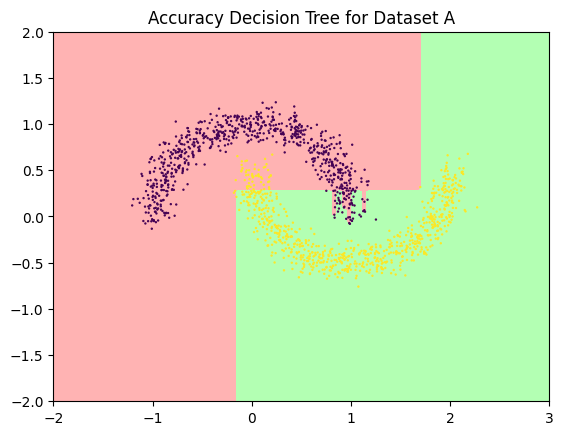

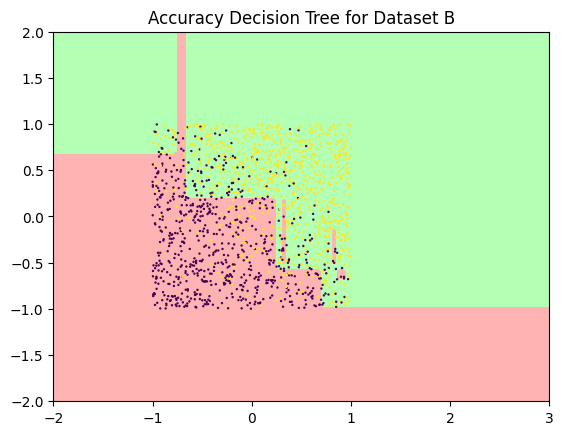

In [326]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

def plottree(data,treeacc,Name):
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    Y_train = Y_train.reshape(Y_train.size,1)
    Y_test = Y_test.reshape(Y_test.size,1)
    X,Y = np.meshgrid(np.linspace(-2,3,100),np.linspace(-2,2,100))
    Z = eval_decision_tree(treeacc,np.c_[X.ravel(),Y.ravel()])
    Z = Z.reshape(100,100)
    plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
    plt.scatter(X_train[:,0],X_train[:,1],s=0.5,c=Y_train)
    plt.title("Accuracy Decision Tree for Dataset "+Name)
    plt.show()

plottree(dataA,A_acc,'A')
plottree(dataB,B_acc,'B')
    


# 4 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [327]:
# CodeWrite cell
# Write Random Forest classifier. 

def bootstrapping(X,Y,a = 0.5): #X (n,d) Y (n,1)
    n = X.shape[0]
    m = int(n*a)
    idx = np.random.choice(n,m,replace=True)
    return X[idx],Y[idx]

class Forest:
    def __init__(self):
        self.trees = []

    def add(self,tree):
        self.trees.append(tree)

class node:
    def __init__(self,feature,threshold,label):
        self.feature = feature
        self.threshold = threshold
        self.label = 0
        self.left = None
        self.right = None
        
def entropycal(p):
    if p == 0 or p == 1:
        return 0
    return -p*np.log2(p)-(1-p)*np.log2(1-p)

#find best threshold and feature for more than 2 features
def eval_split(X,Y,criterion,b):
    bestfeature = None
    bestthreshold = None
    bestentropy = 1
    bestaccuracy = 0
    idx = np.random.choice(X.shape[1],int(b*X.shape[1]),replace=False)
    for i in idx:
        thresholds = np.sort(np.unique(X[:,i]))
        x_val = np.sort(X[:,i])
        y_val = Y[np.argsort(X[:,i])]
        leftpos = 0
        rightpos = np.count_nonzero(y_val==1)
        leftcount = 0
        rightcount = y_val.shape[0]
        #print(y_val.shape[0])
        for j in thresholds:
            while (leftcount < x_val.shape[0] and x_val[leftcount] < j):
                if y_val[leftcount] == 1:
                    leftpos += 1
                    rightpos -=1
                leftcount += 1
                rightcount -= 1
            if criterion == "accuracy":
                leftneg = leftcount - leftpos
                rightneg = rightcount - rightpos
                acc_pp = (leftpos + rightpos)
                acc_pn = (leftpos + rightneg)
                acc_np = (leftneg + rightpos)
                acc_nn = (leftneg + rightneg)
                accuracy = max(acc_pp,acc_pn,acc_np,acc_nn)/(leftcount + rightcount)
                if accuracy > bestaccuracy:
                    bestaccuracy = accuracy
                    bestthreshold = j
                    bestfeature = i
            elif criterion == "entropy" and leftcount != 0 and rightcount != 0:
                leftentropy = entropycal(leftpos/leftcount)
                rightentropy = entropycal(rightpos/rightcount)
                entropy = (leftcount/y_val.shape[0])*leftentropy + (rightcount/y_val.shape[0])*rightentropy
                if entropy < bestentropy:
                    bestentropy = entropy
                    bestthreshold = j
                    bestfeature = i
    return bestfeature,bestthreshold


#label is 1 or -1
def splitnode(X,Y,num_nodes_stop,criterion,b):
    temp = node(None,None,None)
    if(X.shape[0] <= num_nodes_stop):
        temp.label = np.sign(np.sum(Y)) if np.sum(Y) != 0 else 1
        return temp
    if(np.sum(Y) == Y.shape[0]):
        temp.label = 1
        return temp
    if(np.sum(Y) == -Y.shape[0]):
        temp.label = -1
        return temp
    temp.label = 0
    feature,threshold = eval_split(X,Y,criterion,b)
    temp.feature = feature
    temp.threshold = threshold
    Xleft = X[X[:,feature] <= threshold]
    Yleft = Y[X[:,feature] <= threshold]
    Xright = X[X[:,feature] > threshold]
    Yright = Y[X[:,feature] > threshold]
    if(Xleft.shape[0] == 0 or Xright.shape[0] == 0):
        temp.label = np.sign(np.sum(Y)) if np.sum(Y) != 0 else 1
        return temp
    temp.left = splitnode(Xleft,Yleft,num_nodes_stop,criterion,b)
    temp.right = splitnode(Xright,Yright,num_nodes_stop,criterion,b)
    return temp

def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy',b = 0.5):
    """ Returns a decision tree trained on X and Y. 
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    """
    tree = splitnode(X,Y,num_nodes_stop,criterion,b)
    return tree
    




def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1, 
                        criterion='accuracy', a=0.5, b=0.5):
    """ Returns a random forest trained on X and Y. 
    Trains num_trees.
    Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Fraction of data used per tree = a
    Fraction of features used in each node = b
    Returns a random forest (In whatever format that you find appropriate)
    """
    forest = Forest()
    for i in range(num_trees):
        X_train,Y_train = bootstrapping(X,Y,a)
        tree = train_decision_tree(X_train,Y_train,num_nodes_stop,criterion,b)
        forest.add(tree)
    return forest

    

def eval_random_forest(random_forest, test_X):
    """ Takes in a  random forest object (hhowever you want to store it), and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    
    pred = np.array([eval_decision_tree(tree,test_X) for tree in random_forest.trees])
    pred = np.sign(np.sum(pred,axis=0))
    return pred



In [331]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.

def runforest(data):
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    X_trains, X_val, Y_trains, Y_val = split(X_train,Y_train)
    Y_val = Y_val.reshape(Y_val.size,1)
    Y_test = Y_test.reshape(Y_test.size,1)
    Y_train = Y_train.reshape(Y_train.size,1)
    Y_trains = Y_trains.reshape(Y_trains.size,1)
    training_error = np.zeros(2)
    test_error = np.zeros(2)
    #print("Accuracy")
    bestscore = 0
    bestaccforest = None
    treenum = None
    for i in (5,20,50,100,200):
        #print(i)
        forest = train_random_forest(X_trains,Y_trains,i,1,"accuracy",0.5,0.5)
        predictions = eval_random_forest(forest,X_val)
        score = np.sum(predictions == Y_val)/Y_val.shape[0]
        #print(score)
        if score > bestscore:
            bestscore = score
            treenum = i
            bestaccforest = forest
    #print("Best Accuracy Score: ",bestscore,"Best Tree Number: ",treenum)
    predictions = eval_random_forest(bestaccforest,X_test)
    test_error[0] = np.count_nonzero(predictions != Y_test)/Y_test.shape[0]
    predictions = eval_random_forest(bestaccforest,X_train)
    training_error[0] = np.count_nonzero(predictions != Y_train)/Y_train.shape[0]
    #print("Training Error: ",training_error[0],"Test Error: ",test_error[0])
    print("Accuracy: num_trees = ",treenum,"Training Error: ",training_error[0],"Test Error: ",test_error[0])
    #print("Entropy")
    bestscore = 0
    bestentforest = None
    for i in (5,20,50,100,200):
        forest = train_random_forest(X_trains,Y_trains,i,1,"entropy",0.5,0.5)
        predictions = eval_random_forest(forest,X_val)
        score = np.count_nonzero(predictions == Y_val)/Y_val.shape[0]
        if score > bestscore:
            bestscore = score
            treenum = i
            bestentforest = forest
    #print("Best Entropy Score: ",bestscore,"Best Tree Number: ",treenum)
    predictions = eval_random_forest(bestentforest,X_test)
    test_error[1] = np.count_nonzero(predictions != Y_test)/Y_test.shape[0]
    predictions = eval_random_forest(bestentforest,X_train)
    training_error[1] = np.count_nonzero(predictions != Y_train)/Y_train.shape[0]
    #print("Training Error: ",training_error[1],"Test Error: ",test_error[1])
    print("Entropy: num_trees = ",treenum,"Training Error: ",training_error[1],"Test Error: ",test_error[1])
    return bestaccforest,bestentforest

print("Dataset A")
forestaccA, forestentA = runforest(dataA)
print("----------------------")
print("Dataset B")#
forestaccB, forestentB = runforest(dataB)
print("----------------------")
print("Dataset C")
forestaccC, forestentC = runforest(dataC)
print("----------------------")
print("Dataset D")
forestaccD, forestentD = runforest(dataD)
print("----------------------")


    


    
        


Dataset A
Accuracy: num_trees =  100 Training Error:  0.084 Test Error:  0.11
Entropy: num_trees =  20 Training Error:  0.008 Test Error:  0.022
----------------------
Dataset B
Accuracy: num_trees =  5 Training Error:  0.174 Test Error:  0.222
Entropy: num_trees =  50 Training Error:  0.164 Test Error:  0.21
----------------------
Dataset C
Accuracy: num_trees =  100 Training Error:  0.09533333333333334 Test Error:  0.1447811447811448
Entropy: num_trees =  20 Training Error:  0.04 Test Error:  0.13804713804713806
----------------------
Dataset D
Accuracy: num_trees =  50 Training Error:  0.03 Test Error:  0.047337278106508875
Entropy: num_trees =  5 Training Error:  0.0425 Test Error:  0.07100591715976332
----------------------



### Table of all the best parameters and errors for all datasets
|Dataset|Metric|Num Trees|Training Error|Test Error|
|:---:|:---:|:---:|:---:|:---:|
|A|Accuracy|100|0.084|0.11|
|A|Entropy|20|0.008|0.022|
|B|Accuracy|5|0.174|0.222|
|B|Entropy|50|0.164|0.21|
|C|Accuracy|100|0.095|0.144|
|C|Entropy|20|0.04|0.138|
|D|Accuracy|50|0.03|0.047|
|D|Entropy|5|0.0425|0.071|

### Observations
- Random Forest has better performance in Dataset C and D compared to Decision Tree.
- Random Forest has a similar performance in Dataset A and B compared to Decision Tree.
- Entropy and Accuracy have similar performance for all datasets compared to Decision Tree.
- Random Forest has lesser overfitting compared to Decision Tree due to random feature selection and Training set.


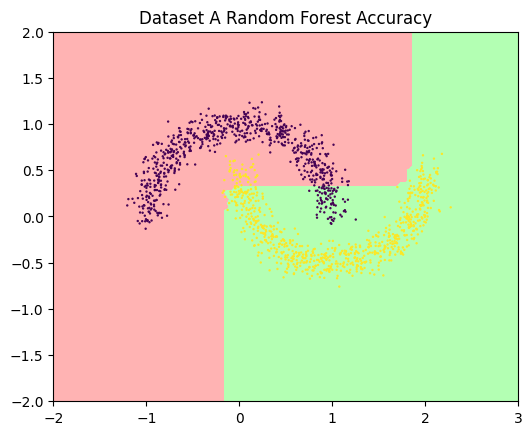

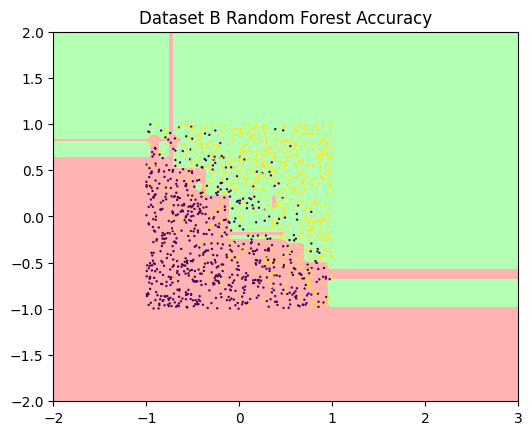

In [332]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 
def plotforest(data,forest,Name):
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    Y_train = Y_train.reshape(Y_train.size,1)
    Y_test = Y_test.reshape(Y_test.size,1)
    f = plt.figure()
    f.set_figwidth(6)
    X,Y = np.meshgrid(np.linspace(-2,3,100),np.linspace(-2,2,100))
    Z = eval_random_forest(forest,np.c_[X.ravel(),Y.ravel()])
    Z = Z.reshape(100,100)
    plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
    plt.scatter(X_train[:,0],X_train[:,1],s=0.5,c=Y_train)
    plt.title("Dataset "+Name+" Random Forest Accuracy")
    plt.show()

plotforest(dataA,forestaccA,'A')
plotforest(dataB,forestaccB,'B')

# 5 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree 
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  plot the train and test accuracy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [289]:
# Codewrite cell
# Write code to run here (no plotting)

def split(X,Y):
    #Y = Y.reshape(Y.size,1)
    #Z = np.concatenate((X,Y),axis=1)
    #np.random.shuffle(Z)
    #X = Z[:,:-1]
    #Y = Z[:,-1]
    X_train = X[:int(0.8*len(X))]
    X_val = X[int(0.8*len(X)):]
    Y_train = Y[:int(0.8*len(Y))]
    Y_val = Y[int(0.8*len(Y)):]
    return X_train, X_val, Y_train, Y_val

class node:
    def __init__(self,feature,threshold,label):
        self.feature = feature
        self.threshold = threshold
        self.label = 0
        self.left = None
        self.right = None
        
def entropycal(p):
    if p == 0 or p == 1:
        return 0
    return -p*np.log2(p)-(1-p)*np.log2(1-p)

#find best threshold and feature for more than 2 features
def eval_split(X,Y,weights):
    bestfeature = None
    bestthreshold = None
    bestaccuracy = 0
    for i in range(X.shape[1]):
        thresholds = np.sort(np.unique(X[:,i]))
        x_val = np.sort(X[:,i])
        y_val = Y[np.argsort(X[:,i])]
        w_val = weights[np.argsort(X[:,i])]
        leftcount = 0
        rightcount = y_val.shape[0]
        leftweight = 0
        rightweight = np.sum(w_val)
        leftpos = 0
        rightpos = np.sum(w_val[y_val == 1])
        leftneg = 0
        rightneg = np.sum(w_val[y_val == -1])
        #print(y_val.shape[0])
        for j in thresholds:
            while (leftcount < x_val.shape[0] and x_val[leftcount] < j):
                if y_val[leftcount] == 1:
                    leftpos += w_val[leftcount]
                    rightpos -= w_val[leftcount]
                else:
                    leftneg += w_val[leftcount]
                    rightneg -= w_val[leftcount]
                leftcount += 1
                rightcount -= 1
            acc_pp = (leftpos + rightpos)
            acc_pn = (leftpos + rightneg)
            acc_np = (leftneg + rightpos)
            acc_nn = (leftneg + rightneg)
            accuracy = max(acc_pp,acc_pn,acc_np,acc_nn)/(np.sum(w_val))
            if accuracy > bestaccuracy:
                bestaccuracy = accuracy
                bestthreshold = j
                bestfeature = i
    return bestfeature,bestthreshold


#label is 1 or -1
def splitnode(X,Y,num_nodes_stop,depth,max_depth,weights):
    temp = node(None,None,None)
    if(X.shape[0] <= num_nodes_stop or depth == max_depth):
        y = Y.reshape(Y.size,1)
        Y_weight = np.multiply(y,weights)
        temp.label = np.sign(np.sum(Y_weight)) if np.sum(Y_weight) != 0 else 1
        return temp
    if(np.sum(Y) == Y.shape[0]):
        temp.label = 1
        return temp
    if(np.sum(Y) == -Y.shape[0]):
        temp.label = -1
        return temp
    temp.label = 0
    feature,threshold = eval_split(X,Y,weights)
    #print(feature,threshold)
    temp.feature = feature
    temp.threshold = threshold
    Xleft = X[X[:,feature] <= threshold]
    Yleft = Y[X[:,feature] <= threshold]
    Xright = X[X[:,feature] > threshold]
    Yright = Y[X[:,feature] > threshold]
    weightsleft = weights[X[:,feature] <= threshold]
    weightsright = weights[X[:,feature] > threshold]
    if(Xleft.shape[0] == 0 or Xright.shape[0] == 0):
        y = Y.reshape(Y.size,1)
        Y_weight = np.multiply(y,weights)
        temp.label = np.sign(np.sum(Y_weight)) if np.sum(Y_weight) != 0 else 1
        return temp
    temp.left = splitnode(Xleft,Yleft,num_nodes_stop,depth+1,max_depth,weightsleft)
    temp.right = splitnode(Xright,Yright,num_nodes_stop,depth+1,max_depth,weightsright)
    return temp

def train_decision_tree(X, Y, num_nodes_stop=1, max_depth = 1,weight = None):
    """ Returns a decision tree trained on X and Y. 
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    """
    tree = splitnode(X,Y,num_nodes_stop,0,max_depth,weight)
    return tree
    

def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    
    # YOUR CODE HERE
    pred = np.zeros((len(test_X),1))
    for i in range(len(test_X)):
        node = tree
        while(node.label == 0):
            #print(node.label, node.feature, node.threshold)
            if(test_X[i][node.feature] > node.threshold):
                node = node.right
            else:
                node = node.left
        pred[i] = node.label
    return pred

def Adatrain(X,Y,X_test,Y_test,max_depth):
    #AdaBoost train for 50 iterations
    X_train, X_val, Y_train, Y_val = split(X,Y)
    N = X_train.shape[0]
    w = np.ones((N,1))/N
    trees = []
    alphas = []
    train_accuracy = []
    test_accuracy = []
    for i in range(50):
        #print(i)
        tree = train_decision_tree(X_train,Y_train,1,max_depth,w)
        pred = eval_decision_tree(tree,X_train)
        gamma = 0.5 - (1/np.sum(w))*np.sum(np.multiply(w,pred != Y_train))
        beta = (0.5 + gamma)/(0.5 - gamma)
        w = np.multiply(w,np.power(beta,pred != Y_train))
        trees.append(tree)
        alphas.append(np.log2(beta))
        train_pred = Adaval(X_train,trees,alphas)
        test_pred = Adaval(X_test,trees,alphas)
        train_accuracy.append(np.sum(train_pred == Y_train)/Y_train.shape[0])
        test_accuracy.append(np.sum(test_pred == Y_test)/Y_test.shape[0])
    return trees,alphas,train_accuracy,test_accuracy
    

def Adaval(test_X,trees,alphas):
    pred = np.zeros((len(test_X),1))
    for i in range(len(trees)):
        pred += alphas[i]*eval_decision_tree(trees[i],test_X)
    return np.sign(pred)
    

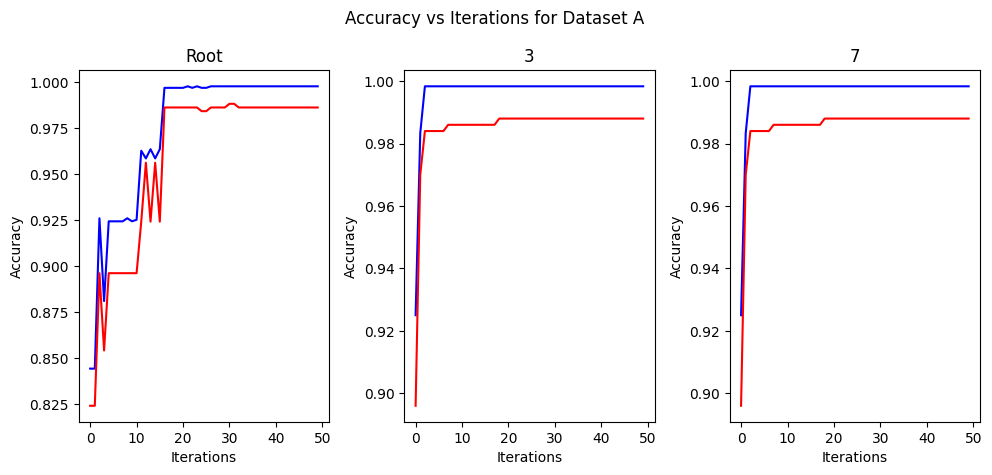

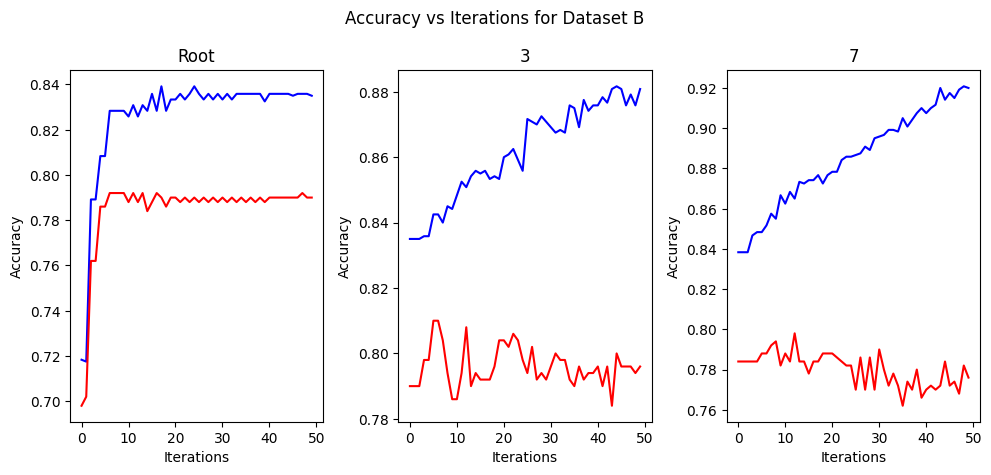

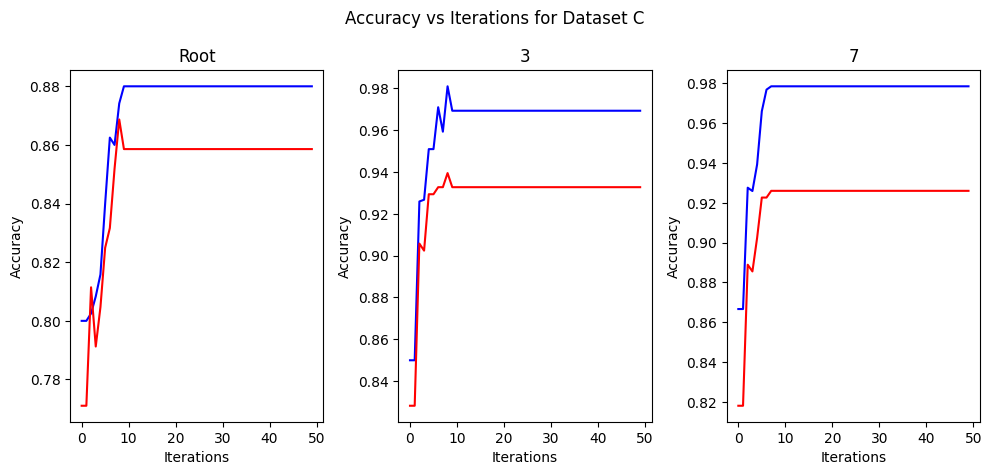

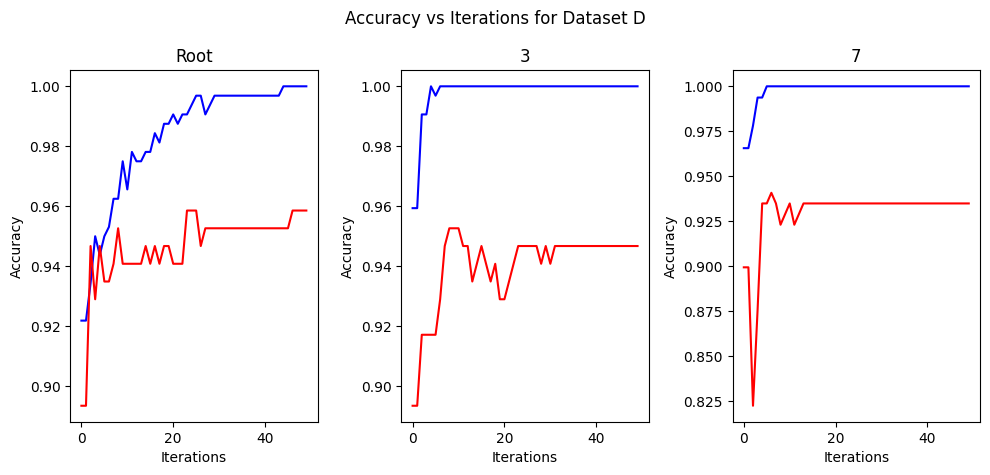

In [304]:
# Codewrite cell 
# Plots for iteration vs error here
def plotiter(data,Name):
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    Y_train = Y_train.reshape(Y_train.size,1)
    Y_test = Y_test.reshape(Y_test.size,1)
    trees1,alphas1,train_accuracy,test_accuracy = Adatrain(X_train,Y_train,X_test,Y_test,1)
    f = plt.figure()
    f.set_figwidth(10)
    plt.subplot(1,3,1)
    plt.plot(range(50),train_accuracy,label = 'train',color = 'blue')
    plt.plot(range(50),test_accuracy,label = 'test',color = 'red')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Root')
    trees4,alphas4,train_accuracy,test_accuracy = Adatrain(X_train,Y_train,X_test,Y_test,4)
    plt.subplot(1,3,2)
    plt.plot(range(50),train_accuracy,label = 'train',color = 'blue')
    plt.plot(range(50),test_accuracy,label = 'test',color = 'red')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('3')
    trees7,alphas7,train_accuracy,test_accuracy = Adatrain(X_train,Y_train,X_test,Y_test,8)
    plt.subplot(1,3,3)
    plt.plot(range(50),train_accuracy,label = 'train',color = 'blue')
    plt.plot(range(50),test_accuracy,label = 'test',color = 'red')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('7')
    plt.suptitle('Accuracy vs Iterations for Dataset '+Name)
    plt.tight_layout()
    plt.show()
    return trees1,alphas1,trees4,alphas4,trees7,alphas7


trees1a,alphas1a,trees4a,alphas4a,trees7a,alphas7a = plotiter(dataA,'A')
trees1b,alphas1b,trees4b,alphas4b,trees7b,alphas7b = plotiter(dataB,'B')
trees1,alphas1,trees4,alphas4,trees7,alphas7 = plotiter(dataC,'C')
trees1,alphas1,trees4,alphas4,trees7,alphas7 = plotiter(dataD,'D')

    

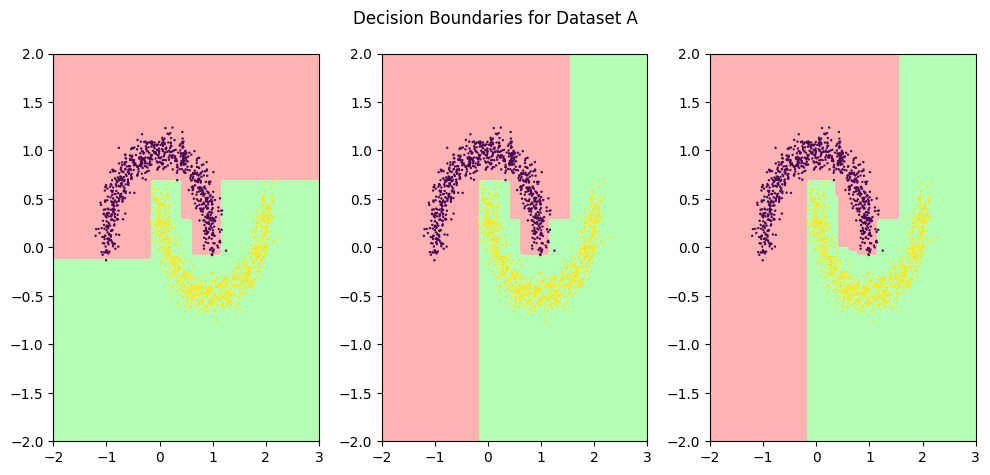

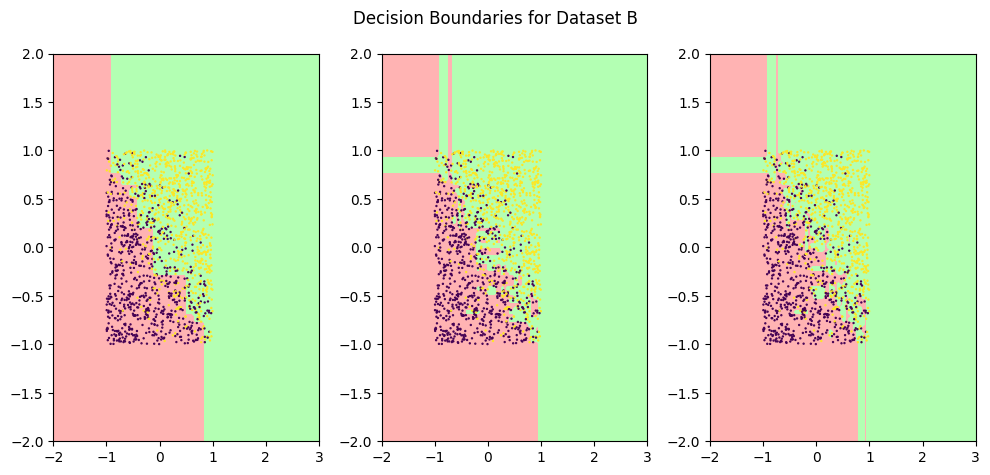

In [306]:
# Codewrite cell 
# Plots for illustrating the classifier here
def adaplot(data,tree1,tree3,tree7,alpha1,alpha3,alpha7,Name):
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    Y_train = Y_train.reshape(Y_train.size,1)
    Y_test = Y_test.reshape(Y_test.size,1)
    X,Y = np.meshgrid(np.linspace(-2,3,100),np.linspace(-2,2,100))
    Z = Adaval(np.c_[X.ravel(),Y.ravel()],tree1,alpha1)
    Z = Z.reshape(100,100)
    f = plt.figure()
    f.set_figwidth(10)
    plt.subplot(1,3,1)
    plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
    plt.scatter(X_train[:,0],X_train[:,1],s=0.5,c=Y_train)
    Z = Adaval(np.c_[X.ravel(),Y.ravel()],tree3,alpha3)
    Z = Z.reshape(100,100)
    plt.subplot(1,3,2)
    plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
    plt.scatter(X_train[:,0],X_train[:,1],s=0.5,c=Y_train)
    Z = Adaval(np.c_[X.ravel(),Y.ravel()],tree7,alpha7)
    Z = Z.reshape(100,100)
    plt.subplot(1,3,3)
    plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
    plt.scatter(X_train[:,0],X_train[:,1],s=0.5,c=Y_train)
    plt.suptitle('Decision Boundaries for Dataset '+Name)
    plt.tight_layout()
    plt.show()

adaplot(dataA,trees1a,trees4a,trees7a,alphas1a,alphas4a,alphas7a,'A')
adaplot(dataB,trees1b,trees4b,trees7b,alphas1b,alphas4b,alphas7b,'B')



### Observations
- AdaBoost has a very good performance after a few iterations.
- The performance increases intitially with the number of iterations and then eventually becomes nearly constant.
- The graph for Dataset B is very noisy as the data is not easily seperable.
- In Dataset A, the accuracy for only Root grows slower compared to higher depths but all eventually reach a similar accuracy in training and test.
- In Dataset C and D the accuracy grows slower for Root compared to higher depths.
- In Dataset B, the accuracy for training reaches higher for higher depths but the final accuracy for test is irregular and is actually lower for depth 7.
- In Dataset C, the accuracy for training is higher for higher depths but the final accuracy for test is the highest for depth 3 and depth 7, root in order.
- In Dataset D, the accuracy for training is higher for higher depths but the final accuracy for test is lower for higher depths.